Training Data Shape: (60000, 785)
Testing Data Shape: (10000, 785)
Training Set: (48000, 784) (48000, 10)
Validation Set: (12000, 784) (12000, 10)
Test Set: (10000, 784) (10000, 10)


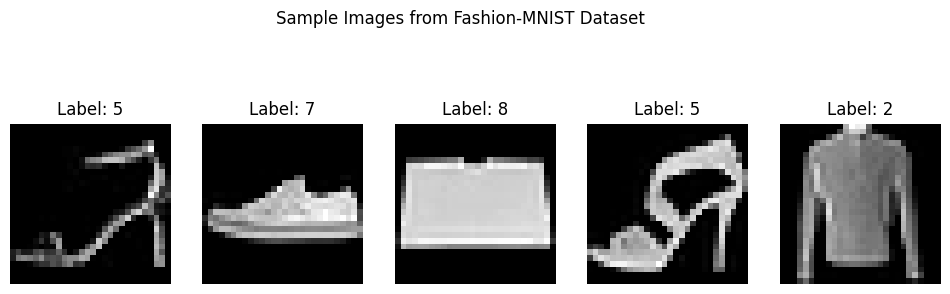

You must install pydot (`pip install pydot`) for `plot_model` to work.


C:\Users\rog20\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7979 - loss: 0.5654 - val_accuracy: 0.8450 - val_loss: 0.4230
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8450 - loss: 0.4210 - val_accuracy: 0.8643 - val_loss: 0.3730
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8593 - loss: 0.3856 - val_accuracy: 0.8643 - val_loss: 0.3714
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8656 - loss: 0.3662 - val_accuracy: 0.8721 - val_loss: 0.3581
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8720 - loss: 0.3502 - val_accuracy: 0.8747 - val_loss: 0.3411
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8750 - loss: 0.3381 - val_accuracy: 0.8783 - val_loss: 0.3298
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8789 - loss: 0.3291 - val_accuracy: 0.8844 - val_loss: 0.3144
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8830 - loss: 0.3155 - val_accuracy: 0.

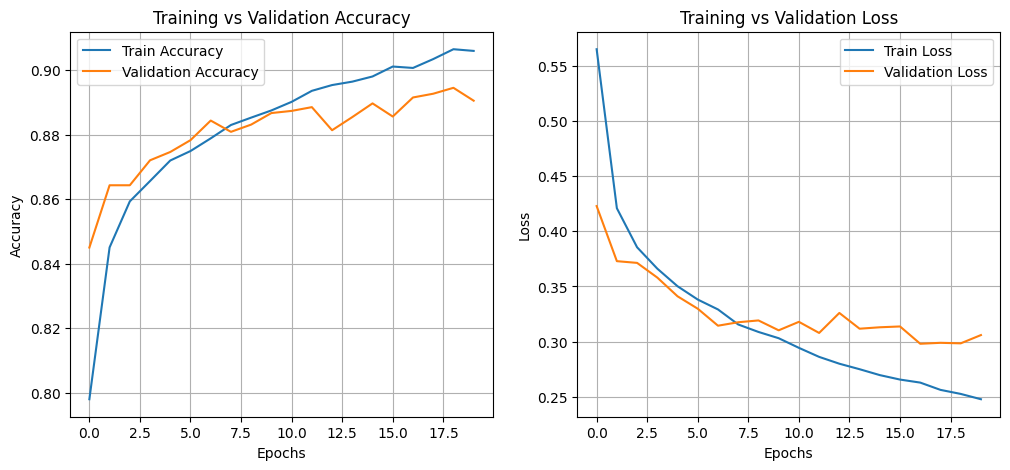


Test Accuracy: 88.95%
Test Loss: 0.3053
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step


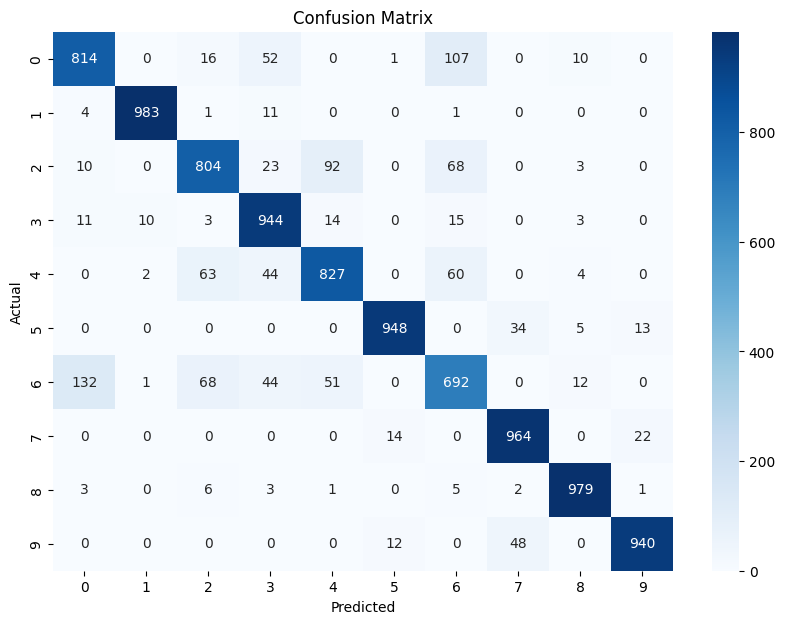


Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.80      0.82      1000
           3       0.84      0.94      0.89      1000
           4       0.84      0.83      0.83      1000
           5       0.97      0.95      0.96      1000
           6       0.73      0.69      0.71      1000
           7       0.92      0.96      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


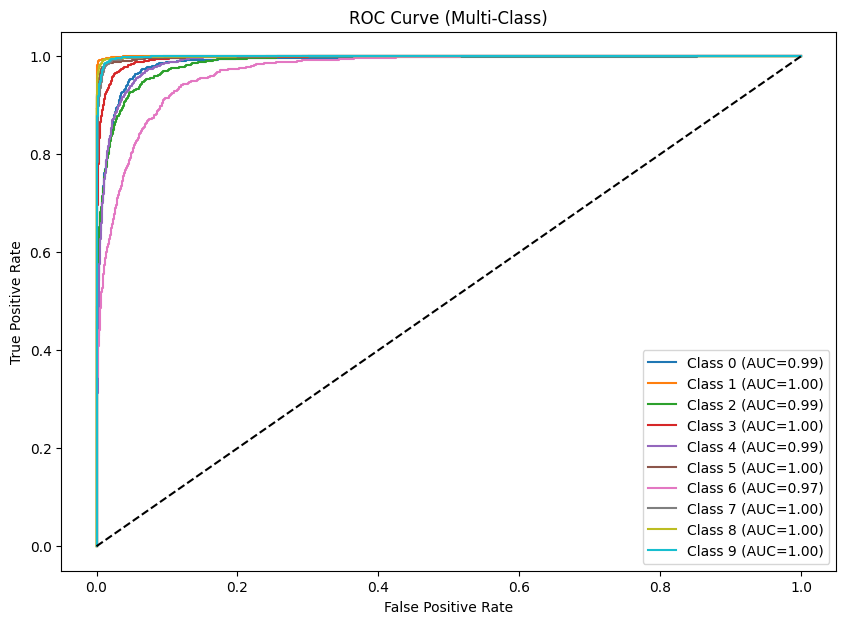

In [2]:
# ==============================================================
# EXPERIMENT 3: Application of DL Framework for Classification
# Dataset: Fashion-MNIST (Kaggle)
# Framework: TensorFlow + Keras
# ==============================================================

# ----------------------------
# 1. Import Required Libraries
# ----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# ----------------------------
# 2. Load Dataset
# ----------------------------
train_path = "fashion-mnist_train.csv"
test_path = "fashion-mnist_test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Training Data Shape:", train_df.shape)
print("Testing Data Shape:", test_df.shape)

# ----------------------------
# 3. Data Preprocessing
# ----------------------------

# Separate features and labels
X_train_full = train_df.drop("label", axis=1).values
y_train_full = train_df["label"].values

X_test = test_df.drop("label", axis=1).values
y_test = test_df["label"].values

# Normalize pixel values (0-255 -> 0-1)
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_val_cat = to_categorical(y_val, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print("Training Set:", X_train.shape, y_train_cat.shape)
print("Validation Set:", X_val.shape, y_val_cat.shape)
print("Test Set:", X_test.shape, y_test_cat.shape)

# ----------------------------
# 4. EDA: Visualizing Some Images
# ----------------------------
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")
plt.suptitle("Sample Images from Fashion-MNIST Dataset")
plt.show()

# ----------------------------
# 5. Build Sequential Neural Network
# ----------------------------
model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

# Visualize Model Architecture
plot_model(model, to_file="EXP_3_MODEL_ARCHITECTURE.png", show_shapes=True, show_layer_names=True)

# ----------------------------
# 6. Compile the Model
# ----------------------------
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ----------------------------
# 7. Train the Model
# ----------------------------
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=20,
    batch_size=64,
    verbose=1
)

# ----------------------------
# 8. Plot Accuracy and Loss Curves
# ----------------------------
plt.figure(figsize=(12, 5))

# Accuracy Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid()

# Loss Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()

plt.show()

# ----------------------------
# 9. Evaluate Model on Test Set
# ----------------------------
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# ----------------------------
# 10. Confusion Matrix
# ----------------------------
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ----------------------------
# 11. Classification Report
# ----------------------------
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ----------------------------
# 12. ROC Curve (One-vs-Rest)
# ----------------------------
y_test_bin = label_binarize(y_test, classes=np.arange(10))
y_score = model.predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 7))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC={roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class)")
plt.legend()
plt.show()
